# Calls for Service in the City of Nashville
#### Gabe Gibitz

## DATA ANALYSIS OF SHOTS FIRED

The city of Nashville makes much of their city's data accessible in order to encourage partnership between the general public and the city to make Nashville an even better place to live. We will be taking a look at the service calls for the city of Nashville across the span of five years -- from 2016 to 2020.

From first look, the 19 columns (features) are consistent from year to year, so that will allow us to easily make comparisons from year to year.

Let's dive in!

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Import and Wrangle the Data

In [3]:
df16 = pd.read_csv('data/Metro_Nashville_Police_Department_Calls_for_Service__2016_.csv')

In [4]:
df17 = pd.read_csv('data/Metro_Nashville_Police_Department_Calls_for_Service__2017_.csv')

In [5]:
df18 = pd.read_csv('data/Metro_Nashville_Police_Department_Calls_for_Service__2018_.csv')

In [6]:
df19 = pd.read_csv('data/Metro_Nashville_Police_Department_Calls_for_Service__2019_.csv')

I originally imported 2020's dataframe, but it has information all the way back to 2012. I would need to spend some quality time with this CSV, so I'm going to drop it for now (especially because 2020 is still in Q3 at the time of this code).

In [7]:
df16.head()

Event Number           Call Received  Complaint Number Shift  Tencode  \
0  PD201600000001  01/01/2016 12:00:00 AM       20160000002     C       96   
1  PD201600000002  01/01/2016 12:00:00 AM       20160000003     C       96   
2  PD201600000003  01/01/2016 12:00:00 AM       20160000017     C       45   
3  PD201600000004  01/01/2016 12:00:00 AM                 0     C       83   
4  PD201600000005  01/01/2016 12:00:00 AM       20160000005     C       96   

                  Tencode Description Tencode Suffix  \
0                      Business Check            NaN   
1                      Business Check            NaN   
2  Vehicle Accident - Property Damage              P   
3                         Shots Fired              P   
4                      Business Check            NaN   

  Tencode Suffix Description  Disposition Code   Disposition Description  \
0                        NaN                12  LOCATION/BUILDING SECURE   
1                        NaN                12  LOCATION/BUILDING SECURE   
2                   PROGRESS                 1     M.P.D. REPORT COMPLED   
3                   PROGRESS                11      DISREGARD / SIGNAL 9   
4                        NaN                12  LOCATION/BUILDING SECURE   

    Block                  Street Name Unit Dispatched Sector  Zone     RPA  \
0   300.0                   HERRON DR             311C      S  11.0  8125.0   
1   500.0                     MAIN ST             213C      E  11.0  1113.0   
2     0.0  EDMONDSON PKE & MCMURRAY DR            835C     MT  33.0  8657.0   
3   500.0                    S 5TH ST              NaN      E  11.0  1011.0   
4  1100.0                     BELL RD             333C      S  25.0  8721.0   

   Latitude  Longitude    Mapped Location  
0    36.133    -86.752  (36.133, -86.752)  
1    36.173    -86.764  (36.173, -86.764)  
2    36.055    -86.743  (36.055, -86.743)  
3    36.167    -86.762  (36.167, -86.762)  
4    36.046    -86.666  (36.046, -86.666)

In [8]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127959 entries, 0 to 1127958
Data columns (total 19 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Event Number                1127959 non-null  object 
 1   Call Received               1127959 non-null  object 
 2   Complaint Number            1127959 non-null  int64  
 3   Shift                       1080373 non-null  object 
 4   Tencode                     1127959 non-null  int64  
 5   Tencode Description         1127959 non-null  object 
 6   Tencode Suffix              607599 non-null   object 
 7   Tencode Suffix Description  588170 non-null   object 
 8   Disposition Code            1127959 non-null  int64  
 9   Disposition Description     1122349 non-null  object 
 10  Block                       1089874 non-null  float64
 11  Street Name                 1127955 non-null  object 
 12  Unit Dispatched             1072829 non-null  object 
 1

In [9]:
#Let's merge these!
df = pd.concat([df16, df17, df18, df19], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3765700 entries, 0 to 785034
Data columns (total 19 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Event Number                object 
 1   Call Received               object 
 2   Complaint Number            int64  
 3   Shift                       object 
 4   Tencode                     int64  
 5   Tencode Description         object 
 6   Tencode Suffix              object 
 7   Tencode Suffix Description  object 
 8   Disposition Code            int64  
 9   Disposition Description     object 
 10  Block                       float64
 11  Street Name                 object 
 12  Unit Dispatched             object 
 13  Sector                      object 
 14  Zone                        object 
 15  RPA                         float64
 16  Latitude                    float64
 17  Longitude                   float64
 18  Mapped Location             object 
dtypes: float64(4), int64(3

In [9]:
df.head(10)

Event Number           Call Received  Complaint Number Shift  Tencode  \
0  PD201600000001  01/01/2016 12:00:00 AM       20160000002     C       96   
1  PD201600000002  01/01/2016 12:00:00 AM       20160000003     C       96   
2  PD201600000003  01/01/2016 12:00:00 AM       20160000017     C       45   
3  PD201600000004  01/01/2016 12:00:00 AM                 0     C       83   
4  PD201600000005  01/01/2016 12:00:00 AM       20160000005     C       96   
5  PD201600000006  01/01/2016 12:00:00 AM       20160000006     C       46   
6  PD201600000007  01/01/2016 12:00:00 AM                 0     C       83   
7  PD201600000008  01/01/2016 12:02:00 AM       20160000011     C       83   
8  PD201600000009  01/01/2016 12:02:00 AM       20160000008     C       83   
9  PD201600000010  01/01/2016 12:02:00 AM                 0     C       83   

                  Tencode Description Tencode Suffix  \
0                      Business Check            NaN   
1                      Business Check            NaN   
2  Vehicle Accident - Property Damage              P   
3                         Shots Fired              P   
4                      Business Check            NaN   
5  Vehicle Accident - Personal Injury              P   
6                         Shots Fired              P   
7                         Shots Fired              P   
8                         Shots Fired              P   
9                         Shots Fired              P   

  Tencode Suffix Description  Disposition Code   Disposition Description  \
0                        NaN                12  LOCATION/BUILDING SECURE   
1                        NaN                12  LOCATION/BUILDING SECURE   
2                   PROGRESS                 1     M.P.D. REPORT COMPLED   
3                   PROGRESS                11      DISREGARD / SIGNAL 9   
4                        NaN                12  LOCATION/BUILDING SECURE   
5                   PROGRESS                11      DISREGARD / SIGNAL 9   
6                   PROGRESS                11      DISREGARD / SIGNAL 9   
7                   PROGRESS                 5           GONE ON ARRIVAL   
8                   PROGRESS                11      DISREGARD / SIGNAL 9   
9                   PROGRESS                11      DISREGARD / SIGNAL 9   

    Block                    Street Name Unit Dispatched Sector Zone     RPA  \
0   300.0                     HERRON DR             311C      S   11  8125.0   
1   500.0                       MAIN ST             213C      E   11  1113.0   
2     0.0    EDMONDSON PKE & MCMURRAY DR            835C     MT   33  8657.0   
3   500.0                      S 5TH ST              NaN      E   11  1011.0   
4  1100.0                       BELL RD             333C      S   25  8721.0   
5     0.0  MT VIEW RD & MURFREESBORO PKE            333C      S   33  8865.0   
6   600.0                      S 6TH ST              NaN      E   11  1021.0   
7  2500.0                      SANTI AV             613C      N   13  4463.0   
8     0.0                   HERMITAGE AV            511C    NaN  NaN     NaN   
9  1600.0                      CAHAL AV              NaN      E   17  1431.0   

   Latitude  Longitude    Mapped Location  
0    36.133    -86.752  (36.133, -86.752)  
1    36.173    -86.764  (36.173, -86.764)  
2    36.055    -86.743  (36.055, -86.743)  
3    36.167    -86.762  (36.167, -86.762)  
4    36.046    -86.666  (36.046, -86.666)  
5    36.054    -86.619  (36.054, -86.619)  
6    36.166    -86.759  (36.166, -86.759)  
7    36.179    -86.818  (36.179, -86.818)  
8       NaN        NaN                NaN  
9    36.196    -86.734  (36.196, -86.734)

#### Question Time!

I like this quote from Albert Einstein:
"If I had an hour to solve a problem and my life depended on it,
I would use the first 55 minutes determining the proper question to ask, 
for once I know the proper question, I could solve the problem in less than five minutes."

In the spirit of Einstein and data science/analytics, let's ask some questions and make a few observations.

A few observations:
- 'Event Number' is an object, not technically a number.
- The 'Call Received' column is not a date.

Several questions to begin our exploration:
- I'm assuming 'Shift' refers to first, second and third shift. A,B,C? Need to confirm that.
- 'Tencode' is connected to 'Tencode Description'...how many codes are there?
- What is the importance of 'Tencode Suffix'? How many different values exist, and what do they mean?
- What is 'Disposition Code'? Is it a spectrum of the disposition of the people involved?
- Ah, the 'Disposition Description' helps me see what the 'Disposition Code' is.
- How many 'Blocks' are there in Nashville? Check the map to get a sense of the block locations.
- What is the difference between 'Block' and 'Sector'? And 'Sector' vs. 'Zone'?
- What is RPA? I don't initally see any correlation between the values in the first ten rows of the dataframe.

This is a large dataset. What questions can we ask to narrow our focus?
- What service calls could we funnel off to someone other than the police?
- What service calls are dangerous?
- Can we better predict which of these calls will be dangerous?
- How many calls happen on each shift?
- How have the calls increased or decreased over the years?
- How has COVID in 2020 affected Nashville's service calls?
- How much money can we save with the police force in 2021?
- How many calls can we expect in 2021? What features (columns) would we need to predict this?
- How does the population growth in Nashville correlate with number of calls?
- Compare services calls in Nashville to a similar sized city in the South/Midwest. Are they similar? Why? Why not?
- What programs could we initiate in 2021 in light of service calls?
- Which blocks/sectors/zones have seen the greatest increase in activity from 2016 to 2019?
- Can we predict which blocks/sectors/zones will be problem areas in 2021?
- What additional info do we need from other sources?
- What were the outcomes of these calls? What are the counts of death? Homocide? Suicide?
- Mentioned before, what is the budget of the police force? Are we adequately funded?
- From an HR perspective, how does the morale of police officers (would need to do some surveys) correlate with the activity in each sectr/bloc/zone? What additional programming/leadership needs put in place there?
- How many of these are false alarms? Looks like we may need to disregard disposition codes of 11 to not skew results.
- What can we learn about 'Suicide' calls? How do these correlate to the amount of suicides in Nashville year of year?
- Let's talk about 'Shots Fired.' Where are these happening the most frequently?

#### Shots Fired

Let's dive into one set of service calls: 'Shots Fired.' I considered doing suicide calls, but I thought I'd keep it a bit lighter for this particular analysis.

I spent some time with Nashville's interactive map. That was so helpful to quickly play with parameters in a visual environment in real-time. Let's take a look at this segment of service calls and see what we can find out.

In [10]:
shots = df[df['Tencode']==83]
shots.head()

Event Number           Call Received  Complaint Number Shift  Tencode  \
3  PD201600000004  01/01/2016 12:00:00 AM                 0     C       83   
6  PD201600000007  01/01/2016 12:00:00 AM                 0     C       83   
7  PD201600000008  01/01/2016 12:02:00 AM       20160000011     C       83   
8  PD201600000009  01/01/2016 12:02:00 AM       20160000008     C       83   
9  PD201600000010  01/01/2016 12:02:00 AM                 0     C       83   

  Tencode Description Tencode Suffix Tencode Suffix Description  \
3         Shots Fired              P                   PROGRESS   
6         Shots Fired              P                   PROGRESS   
7         Shots Fired              P                   PROGRESS   
8         Shots Fired              P                   PROGRESS   
9         Shots Fired              P                   PROGRESS   

   Disposition Code Disposition Description   Block   Street Name  \
3                11    DISREGARD / SIGNAL 9   500.0     S 5TH ST    
6                11    DISREGARD / SIGNAL 9   600.0     S 6TH ST    
7                 5         GONE ON ARRIVAL  2500.0     SANTI AV    
8                11    DISREGARD / SIGNAL 9     0.0  HERMITAGE AV   
9                11    DISREGARD / SIGNAL 9  1600.0     CAHAL AV    

  Unit Dispatched Sector Zone     RPA  Latitude  Longitude    Mapped Location  
3             NaN      E   11  1011.0    36.167    -86.762  (36.167, -86.762)  
6             NaN      E   11  1021.0    36.166    -86.759  (36.166, -86.759)  
7            613C      N   13  4463.0    36.179    -86.818  (36.179, -86.818)  
8            511C    NaN  NaN     NaN       NaN        NaN                NaN  
9             NaN      E   17  1431.0    36.196    -86.734  (36.196, -86.734)

In [11]:
shots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25369 entries, 3 to 784798
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Event Number                25369 non-null  object 
 1   Call Received               25369 non-null  object 
 2   Complaint Number            25369 non-null  int64  
 3   Shift                       22944 non-null  object 
 4   Tencode                     25369 non-null  int64  
 5   Tencode Description         25369 non-null  object 
 6   Tencode Suffix              25369 non-null  object 
 7   Tencode Suffix Description  25120 non-null  object 
 8   Disposition Code            25369 non-null  int64  
 9   Disposition Description     25306 non-null  object 
 10  Block                       23325 non-null  float64
 11  Street Name                 25369 non-null  object 
 12  Unit Dispatched             21897 non-null  object 
 13  Sector                      23

In [12]:
#Let's look at the different disposition desriptions of these events.
shots['Disposition Description'].value_counts()

DISREGARD / SIGNAL 9             9741
GONE ON ARRIVAL                  4910
ASSISTED OTHER UNIT              4363
NO RESPONSE                      4184
M.P.D. REPORT COMPLED            1162
ASSISTED CITIZEN                  739
FALSE CALL                         89
SUBJECT WARNED                     52
LOCATION/BUILDING SECURE           24
ASSISTANCE REFUSED                 16
ARREST, CUSTODIAL OR CITATION       9
COMMUNITY POLICING                  7
CITATION - TRAFFIC                  6
ADVISED IN CIVIL CASE               4
Name: Disposition Description, dtype: int64

What is 'Signal 9?' That is the most-used disposition.
Looks like signal 9 is a simple disregard: http://www.serenadedesign.com/mack/metro.htm
Let's drop that column.

'Assisted Other Unit' means that we are duplicating our entry. I looked through several records, and the time between 'Assisted Other Unit' and another diposition code was typically just a few minutes.

'False Call' will also need to be dropped since its...a false call.

'M.P.D. REPORT COMPLED' doesn't have a location, block, sector or zone. I'm deducing that that means that an officer simply completed a report and submitted it. It is connected to another event and is, therefore, a duplicate.

Let's drop all of these columns.

In [13]:
shots.shape

(25369, 19)

In [14]:
no_shot_index = shots[(shots['Disposition Description'] == 'DISREGARD / SIGNAL 9') |
          (shots['Disposition Description'] == 'ASSISTED OTHER UNIT') |
          (shots['Disposition Description'] == 'FALSE CALL') | 
          (shots['Disposition Description'] == 'M.P.D. REPORT COMPLED')].index
real_shots = shots.drop(no_shot_index)
real_shots.shape

(9901, 19)

In [15]:
# So, that leaves us with the following dispositions.
real_shots['Disposition Description'].value_counts()

GONE ON ARRIVAL                  4860
NO RESPONSE                      4141
ASSISTED CITIZEN                  722
SUBJECT WARNED                     52
LOCATION/BUILDING SECURE           24
ASSISTANCE REFUSED                 16
ARREST, CUSTODIAL OR CITATION       8
COMMUNITY POLICING                  7
CITATION - TRAFFIC                  6
ADVISED IN CIVIL CASE               4
Name: Disposition Description, dtype: int64

In [16]:
real_shots.head()

Event Number           Call Received  Complaint Number Shift  Tencode  \
7   PD201600000008  01/01/2016 12:02:00 AM       20160000011     C       83   
13  PD201600000015  01/01/2016 12:03:00 AM       20160000014     C       83   
16  PD201600000019  01/01/2016 12:05:00 AM       20160000070     C       83   
24  PD201600000029  01/01/2016 12:07:00 AM       20160000057     C       83   
27  PD201600000033  01/01/2016 12:08:00 AM       20160000041     C       83   

   Tencode Description Tencode Suffix Tencode Suffix Description  \
7          Shots Fired              P                   PROGRESS   
13         Shots Fired              P                   PROGRESS   
16         Shots Fired              P                   PROGRESS   
24         Shots Fired              P                   PROGRESS   
27         Shots Fired              P                   PROGRESS   

    Disposition Code Disposition Description   Block       Street Name  \
7                  5         GONE ON ARRIVAL  2500.0         SANTI AV    
13                10             NO RESPONSE  3100.0  COUNTRY LAWN DR    
16                 5         GONE ON ARRIVAL  3400.0       TISDALL DR    
24                 5         GONE ON ARRIVAL   500.0  MILL STATION DR    
27                10             NO RESPONSE  1400.0        LITTON AV    

   Unit Dispatched Sector Zone     RPA  Latitude  Longitude    Mapped Location  
7             613C      N   13  4463.0    36.179    -86.818  (36.179, -86.818)  
13            330C      S   35  8975.0    36.072    -86.603  (36.072, -86.603)  
16            625C      N   27  3223.0    36.238    -86.808  (36.238, -86.808)  
24            627C      N   21  3023.0    36.228    -86.800    (36.228, -86.8)  
27            217C      E   17  1413.0    36.202    -86.731  (36.202, -86.731)

In [17]:
real_shots.tail()

Event Number           Call Received  Complaint Number Shift  \
781727  PD201901060709  12/18/2019 07:49:22 PM       20190906154     B   
781956  PD201901060908  12/18/2019 09:41:04 PM       20190906318     B   
782403  PD201901061193  12/19/2019 12:24:28 AM       20190906633     C   
784447  PD201901063674  12/19/2019 07:27:41 PM       20190908685     B   
784798  PD201901064135  12/19/2019 11:35:09 PM       20190909089   NaN   

        Tencode Tencode Description Tencode Suffix Tencode Suffix Description  \
781727       83         Shots Fired              P                   PROGRESS   
781956       83         Shots Fired              P                   PROGRESS   
782403       83         Shots Fired              P                   PROGRESS   
784447       83         Shots Fired              P                   PROGRESS   
784798       83         Shots Fired              P                   PROGRESS   

        Disposition Code Disposition Description   Block  \
781727                10             NO RESPONSE  2600.0   
781956                10             NO RESPONSE     NaN   
782403                 4        ASSISTED CITIZEN  4200.0   
784447                10             NO RESPONSE  1500.0   
784798                 5         GONE ON ARRIVAL     0.0   

                       Street Name Unit Dispatched Sector Zone     RPA  \
781727                 ALAMEDA ST             617B      N   15  5307.0   
781956         E OLD HICKORY BLVD             713B    NaN  NaN     NaN   
782403                 MAXWELL RD             335C      S   35  8967.0   
784447                   9TH AV N             614B      N   17  4345.0   
784798  WARRIOR RD & CHEYENNE BLVD            711C      M   13  1635.0   

        Latitude  Longitude    Mapped Location  
781727    36.166    -86.817  (36.166, -86.817)  
781956       NaN        NaN                NaN  
782403    36.036    -86.579  (36.036, -86.579)  
784447    36.178    -86.798  (36.178, -86.798)  
784798    36.259    -86.679  (36.259, -86.679)

In [18]:
real_shots['Event Number'].value_counts()

PD201800773154    1
PD201600570414    1
PD201700050481    1
PD201800397120    1
PD201900605444    1
                 ..
PD201700381646    1
PD201800054946    1
PD201700795438    1
PD201800527186    1
PD201900233580    1
Name: Event Number, Length: 9901, dtype: int64

In [19]:
# It looks like we still have some duplicates. Let's see what's going on here.
print(real_shots.shape)
real_shots.drop_duplicates(subset ="Event Number", 
                     keep = 'first', inplace = True)
print(real_shots.shape)

(9901, 19)
(9901, 19)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
# Let's make sure we kept the first instance of every duplicate.
real_shots[real_shots['Event Number'] == 'PD201700656877']

Event Number           Call Received  Complaint Number Shift  \
555478  PD201700656877  06/29/2017 10:24:00 PM       20170573244     B   

        Tencode Tencode Description Tencode Suffix Tencode Suffix Description  \
555478       83         Shots Fired              P                   PROGRESS   

        Disposition Code Disposition Description   Block Street Name  \
555478                 5         GONE ON ARRIVAL  3100.0  LONG BLVD    

       Unit Dispatched Sector Zone     RPA  Latitude  Longitude  \
555478            815C     MT   13  5627.0    36.146    -86.819   

          Mapped Location  
555478  (36.146, -86.819)

In [21]:
# Awesome. Looking good. Now, let's create a year column.
real_shots['year'] = real_shots['Call Received'].str.slice(start=6, stop=10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
real_shots.head()

Event Number           Call Received  Complaint Number Shift  Tencode  \
7   PD201600000008  01/01/2016 12:02:00 AM       20160000011     C       83   
13  PD201600000015  01/01/2016 12:03:00 AM       20160000014     C       83   
16  PD201600000019  01/01/2016 12:05:00 AM       20160000070     C       83   
24  PD201600000029  01/01/2016 12:07:00 AM       20160000057     C       83   
27  PD201600000033  01/01/2016 12:08:00 AM       20160000041     C       83   

   Tencode Description Tencode Suffix Tencode Suffix Description  \
7          Shots Fired              P                   PROGRESS   
13         Shots Fired              P                   PROGRESS   
16         Shots Fired              P                   PROGRESS   
24         Shots Fired              P                   PROGRESS   
27         Shots Fired              P                   PROGRESS   

    Disposition Code Disposition Description   Block       Street Name  \
7                  5         GONE ON ARRIVAL  2500.0         SANTI AV    
13                10             NO RESPONSE  3100.0  COUNTRY LAWN DR    
16                 5         GONE ON ARRIVAL  3400.0       TISDALL DR    
24                 5         GONE ON ARRIVAL   500.0  MILL STATION DR    
27                10             NO RESPONSE  1400.0        LITTON AV    

   Unit Dispatched Sector Zone     RPA  Latitude  Longitude  \
7             613C      N   13  4463.0    36.179    -86.818   
13            330C      S   35  8975.0    36.072    -86.603   
16            625C      N   27  3223.0    36.238    -86.808   
24            627C      N   21  3023.0    36.228    -86.800   
27            217C      E   17  1413.0    36.202    -86.731   

      Mapped Location  year  
7   (36.179, -86.818)  2016  
13  (36.072, -86.603)  2016  
16  (36.238, -86.808)  2016  
24    (36.228, -86.8)  2016  
27  (36.202, -86.731)  2016

In [23]:
# Since this is jost of 'shots fired,' we can drop Tencode and Tencode Description.
# To clean up the dataframe, I'll also drop Event Number, Complaint Number, Tencode Suffix and Tencode Suffix Description. 
# We will also drop Street Name, Unit Dispatched, as well as Latitude and Longitude.
real_shots.drop(['Event Number', 'Call Received', 'Complaint Number', 'Tencode',
       'Tencode Description', 'Tencode Suffix', 'Tencode Suffix Description',
       'Street Name', 'Unit Dispatched', 'Latitude', 'Longitude'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
real_shots.head()

Shift  Disposition Code Disposition Description   Block Sector Zone  \
7      C                 5         GONE ON ARRIVAL  2500.0      N   13   
13     C                10             NO RESPONSE  3100.0      S   35   
16     C                 5         GONE ON ARRIVAL  3400.0      N   27   
24     C                 5         GONE ON ARRIVAL   500.0      N   21   
27     C                10             NO RESPONSE  1400.0      E   17   

       RPA    Mapped Location  year  
7   4463.0  (36.179, -86.818)  2016  
13  8975.0  (36.072, -86.603)  2016  
16  3223.0  (36.238, -86.808)  2016  
24  3023.0    (36.228, -86.8)  2016  
27  1413.0  (36.202, -86.731)  2016

In [25]:
real_shots.shape

(9901, 9)

#### Visualizations

Now that we've wrangled the data and cleaned it up quite a bit, let's take a look at some data of the tencode for 'Shots Fired.'

A few audiences will find this especially useful:
- Nashville homeowners and future Nashville homeowners
- Police department decision makers
- The greater Nashville community

Data can be slippery. A few caveats before we start:
- Even though we cleaned the data, this is not a perfect picture of the data.
- The data looks to be collected very well. We are assuming this is the case.
- Not every 'shot fired' is reported. Some may not report the shots to preserve home values. Others may become so used to it that every shot fired is simply not reported.

That said, let's look at the data.

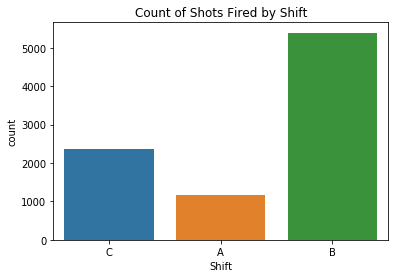

In [26]:
g = sns.countplot(x='Shift', data=real_shots).set_title('Count of Shots Fired by Shift')

I looked up how the Nasville Police Department defines their shifts. I found my best answer here:
https://www.nashville.gov/Police-Department/Precincts/East-Precinct.aspx

I'll summarize that here.

A Shift:
6:30 a.m.-3:00 p.m.

B Shift:
2:30 p.m.-11:00 p.m.

C Shift:
10:30 p.m.-7:00 a.m.

Text(0.5, 1.0, 'Shots Fired by Sector & Grouped By Year')

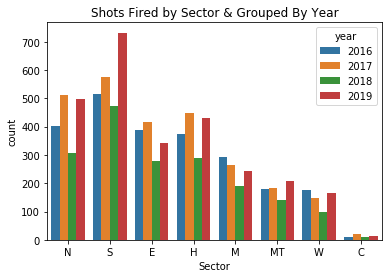

In [29]:
sns.countplot(data=real_shots, x='Sector', hue='year').set_title('Shots Fired by Sector & Grouped By Year')

Odd.

I pulled the years from the event number, but that may have been a mistake. I assumed that the event number correlated with the year of the incident. However, I only pulled the datasets from 2016-2020. There's no reason why I should have data from 2012-2015 in my results. 

I did some digging, and it looks like a lot of our problem is from df20. I'm going to drop this dataframe and re-reun the entire notebook.

In [28]:
real_shots['year'].value_counts()

2017    2794
2019    2691
2016    2544
2018    1872
Name: year, dtype: int64

A few observations at this point:
- 2018 was down significantly in 'Shots Fired.'
- It bucks the trend, so I would want to do more research on that year before concluding anything.
- The same goes for 2019 in the 'S' sector. 
- This doesn't mean much until we overlay population density over each sector. 
- That said, N, S, E and H all have higher 'shots fired' counts.
- M, MT, W and C all have lower shots fired counts.

Text(0.5, 1.0, 'Counts of Shots Fired Per Year for All Nashville')

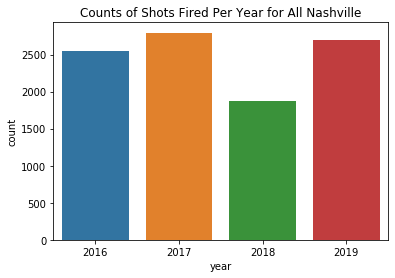

In [30]:
sns.countplot(data=real_shots, x='year').set_title('Counts of Shots Fired Per Year for All Nashville')

From year to year, the count of 'shots fired' in Nashville has't changed much. 2018, as mentioned before, seems to be an outlier. That is an area for more research. Is it a fluke or did something really happen that year to change 'shots fired' counts by 20%.

Text(0.5, 1.0, 'Shots Fired by Zone')

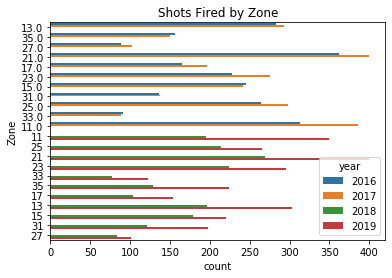

In [34]:
sns.countplot(data=real_shots, y='Zone', hue='year').set_title('Shots Fired by Zone')

Interesting. 

The results are being split because the column has both float and integers, which are being recognized as different numbers. Let's change that real quick.

In [40]:
real_shots.dtypes

Shift                       object
Disposition Code             int64
Disposition Description     object
Block                      float64
Sector                      object
Zone                        object
RPA                        float64
Mapped Location             object
year                        object
dtype: object

In [41]:
real_shots['Zone'] = real_shots['Zone'].astype(float)
real_shots.dtypes

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Shift                       object
Disposition Code             int64
Disposition Description     object
Block                      float64
Sector                      object
Zone                       float64
RPA                        float64
Mapped Location             object
year                        object
dtype: object

In [43]:
real_shots['Zone'].value_counts()

21.0    1431
11.0    1244
13.0    1076
25.0    1042
23.0    1022
15.0     886
35.0     659
17.0     619
31.0     593
33.0     378
27.0     375
Name: Zone, dtype: int64

Text(0.5, 1.0, 'Shots Fired by Zone')

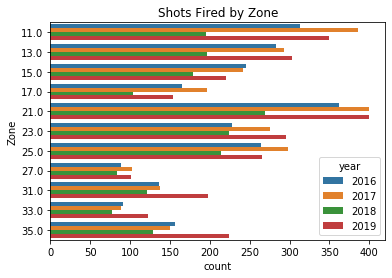

In [44]:
# That should do it. Let's try this again.
sns.countplot(data=real_shots, y='Zone', hue='year').set_title('Shots Fired by Zone')

A few observations:
- The zones with the least shots fired were 27, 31 and 33.
- The zones with the highest amount were 21, 11 and 13 (though 23 and 25 were just as close to 13)
- There was a significant jump in shots fired in zones 31 and 35. Why is this?
- There seemed to be a distinct drop in shots fired over the four years in 15 and 17.

Text(0.5, 1.0, 'Shots Fired by Sector & Grouped By Shift')

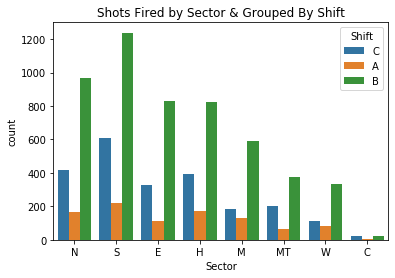

In [45]:
sns.countplot(data=real_shots, x='Sector', hue='Shift').set_title('Shots Fired by Sector & Grouped By Shift')

Text(0.5, 1.0, 'Shots Fired by Sector & Grouped By Year')

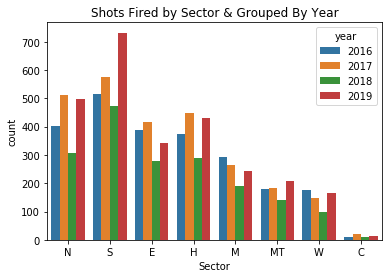

In [46]:
#Let's see that first graph again so we can compare the two.
sns.countplot(data=real_shots, x='Sector', hue='year').set_title('Shots Fired by Sector & Grouped By Year')

## FORECASTING DAILY NUMBER OF SERVICES CALLS

Let's now take a turn from shots fired and make some predictions with machine learning.

There are, of course, many directions we could take this. I'd like to first see if we can predict the number of calls that come in every day. We could break it down by sector, but I'll keep it big-picture right now.

I want to go back as far as we can, so, let's use Jan. 2013 - June 2019 as our dataset and predict on the final six months of 2019 (July-December).

We will use this information to help both police staff and 911 Centers to be ready for the service call volume in Nashville.

In [406]:
# Interestingly, the 2020 dataset that I had problems with earlier has every year since 2013.

df20 = pd.read_csv('data/Metro_Nashville_Police_Department_Calls_for_Service__2020_.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
df20.head()

Event Number           Call Received  Complaint Number Shift  Tencode  \
0  PD201300184546  02/16/2013 12:40:30 AM       20130154221     C       50   
1  PD201300242046  03/03/2013 05:28:45 PM       20130207242     B       83   
2  PD201300523184  05/16/2013 07:45:53 AM       20130463588     A       50   
3  PD201300697687  06/30/2013 10:10:45 AM       20130621533     A       50   
4  PD201300748893  07/13/2013 11:01:08 PM       20130667677   NaN       50   

  Tencode Description Tencode Suffix Tencode Suffix Description  \
0               Theft              P                        NaN   
1         Shots Fired              R                        NaN   
2               Theft              R                        NaN   
3               Theft              R                        NaN   
4               Theft             TV                        NaN   

   Disposition Code Disposition Description  Block    Street Name  \
0                 6     ASSISTED OTHER UNIT    NaN        MAIN ST   
1                10             NO RESPONSE    NaN      LINBAR DR   
2                 0                     NaN    NaN  BONNARIDGE DR   
3                 1   M.P.D. REPORT COMPLED    NaN        LYNN DR   
4                 1   M.P.D. REPORT COMPLED    NaN        BELL RD   

  Unit Dispatched Sector  Zone  RPA  Latitude  Longitude Mapped Location  
0            211C    NaN   NaN  NaN       NaN        NaN             NaN  
1            336B    NaN   NaN  NaN       NaN        NaN             NaN  
2            521A    NaN   NaN  NaN       NaN        NaN             NaN  
3            323A    NaN   NaN  NaN       NaN        NaN             NaN  
4            533B    NaN   NaN  NaN       NaN        NaN             NaN

In [15]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193695 entries, 0 to 8193694
Data columns (total 19 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Event Number                object 
 1   Call Received               object 
 2   Complaint Number            int64  
 3   Shift                       object 
 4   Tencode                     int64  
 5   Tencode Description         object 
 6   Tencode Suffix              object 
 7   Tencode Suffix Description  object 
 8   Disposition Code            int64  
 9   Disposition Description     object 
 10  Block                       float64
 11  Street Name                 object 
 12  Unit Dispatched             object 
 13  Sector                      object 
 14  Zone                        float64
 15  RPA                         float64
 16  Latitude                    float64
 17  Longitude                   float64
 18  Mapped Location             object 
dtypes: float64(5), int64(

I need 'Call Received' to be a date instead of an object, so let's fix this.

Also, for our goals today, I'm concerned with number of calls received. I'm going to assume a few things. I would ask for clarification if this were a real situation. Let's assume:

- Every row is a separate call because it has its own timestamp.
- Even if the call was disregarded or turned out to be nothing, I care about whether or not the call center can staff the call volume.

In [26]:
allCalls = df20['Call Received']
# Test it on a small dataset. 
allCallsShort = allCalls.head(15)
pd.to_datetime(allCallsShort)

0    2013-02-16 00:40:30
1    2013-03-03 17:28:45
2    2013-05-16 07:45:53
3    2013-06-30 10:10:45
4    2013-07-13 23:01:08
5    2013-08-08 03:23:44
6    2013-08-15 23:50:58
7    2013-10-03 16:15:02
8    2014-03-18 23:01:59
9    2015-05-28 17:55:34
10   2016-09-03 08:25:57
11   2016-10-18 17:50:28
12   2017-07-29 13:46:22
13   2017-10-12 11:03:27
14   2017-12-09 23:13:23
Name: Call Received, dtype: datetime64[ns]

In [32]:
# No errors. And now for the long dataset.
allCalls = pd.to_datetime(allCalls, infer_datetime_format=True)

In [33]:
allCalls.head()

0   2013-02-16 00:40:30
1   2013-03-03 17:28:45
2   2013-05-16 07:45:53
3   2013-06-30 10:10:45
4   2013-07-13 23:01:08
Name: Call Received, dtype: datetime64[ns]

In [34]:
# Let's pickle this file so we don't need to convert this to datetime again if we need to reopen it.
# Commenting this out so we don't call this multiple times if we run it again.

# import pickle
# filename = 'nashville_allCalls'
# outfile = open(filename, 'wb')
# pickle.dump(allCalls,outfile)
# outfile.close()

In [418]:
# If you run my code on your own, you can simply us this to import the pickle file.

infile = open(filename, 'rb')
allCalls = pickle.load(infile)
infile.close()
allCalls.head()

0   2013-02-16 00:40:30
1   2013-03-03 17:28:45
2   2013-05-16 07:45:53
3   2013-06-30 10:10:45
4   2013-07-13 23:01:08
Name: Call Received, dtype: datetime64[ns]

In [419]:
# Grouping them by day.
callsByDay = allCalls.groupby(allCalls.dt.date).count()
callsByDay.head()

Call Received
2012-12-28       2
2012-12-29       1
2012-12-31     112
2013-01-01    2465
2013-01-02    4128
Name: Call Received, dtype: int64

In [420]:
# Turning this into a dataframe.
callsByDay = callsByDay.to_frame('Call Received')
callsByDay.index.rename('day', inplace=True)
callsByDay.index

Index([2012-12-28, 2012-12-29, 2012-12-31, 2013-01-01, 2013-01-02, 2013-01-03,
       2013-01-04, 2013-01-05, 2013-01-06, 2013-01-07,
       ...
       2020-08-15, 2020-08-16, 2020-08-17, 2020-08-18, 2020-08-19, 2020-08-20,
       2020-08-21, 2020-08-22, 2020-08-23, 2020-08-24],
      dtype='object', name='day', length=2796)

In [421]:
# Since we are working with a time series, turn the index from 'object' into 'datetime.'
callsByDay.index = pd.to_datetime(callsByDay.index)
callsByDay.index

DatetimeIndex(['2012-12-28', '2012-12-29', '2012-12-31', '2013-01-01',
               '2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
               '2013-01-06', '2013-01-07',
               ...
               '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18',
               '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-22',
               '2020-08-23', '2020-08-24'],
              dtype='datetime64[ns]', name='day', length=2796, freq=None)

In [424]:
callsByDay.rename(columns={'Call Received': 'total_calls'}, inplace=True)
callsByDay.head()

total_calls
day                    
2012-12-28            2
2012-12-29            1
2012-12-31          112
2013-01-01         2465
2013-01-02         4128

In [425]:
callsByDay.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2796 entries, 2012-12-28 to 2020-08-24
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   total_calls  2796 non-null   int64
dtypes: int64(1)
memory usage: 43.7 KB


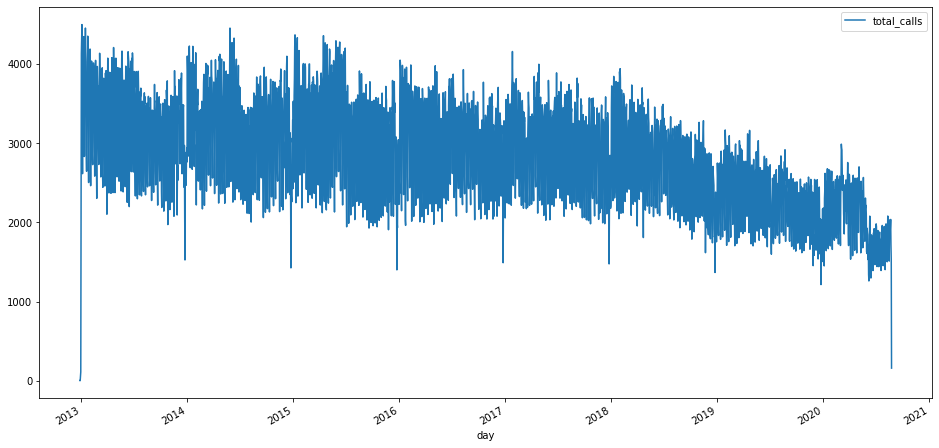

In [426]:
# Let's take a look at the data right now.
fig, ax = plt.subplots(figsize=(16, 8))
callsByDay.plot(ax=ax)

In [468]:
# There are a couple values from 2012 that aren't useful. Let's drop those and create our training and test data.
# I also don't want New Year's Day to throw off any numbers when looking at dasta later, so let's start at Jan. 6.

callData = callsByDay[callsByDay.index.isin(pd.date_range(start='20130106', end='20191231'))]
trainingData = callsByDay[callsByDay.index.isin(pd.date_range(start='20130106', end='20190630'))]
testData = callsByDay[callsByDay.index.isin(pd.date_range(start='20190701', end='20191231'))]

# Let's make a few sets that are just by year so we can better see the chart.
# Daily numbers spanning several years is a bit overwhelming.

calls2015 = callsByDay[callsByDay.index.isin(pd.date_range(start='20150101', end='20151231'))]
calls201501 = callsByDay[callsByDay.index.isin(pd.date_range(start='20150101', end='20190731'))]
calls2019 = callsByDay[callsByDay.index.isin(pd.date_range(start='20190101', end='20191231'))]
calls201901 = callsByDay[callsByDay.index.isin(pd.date_range(start='20190101', end='20190731'))]

In [267]:
# And let's take a look at...
callData

total_calls
day                    
2013-01-06         2615
2013-01-07         3889
2013-01-08         4338
2013-01-09         4223
2013-01-10         4346
...                 ...
2019-12-27         2035
2019-12-28         1526
2019-12-29         1505
2019-12-30         2166
2019-12-31         2171

[2551 rows x 1 columns]

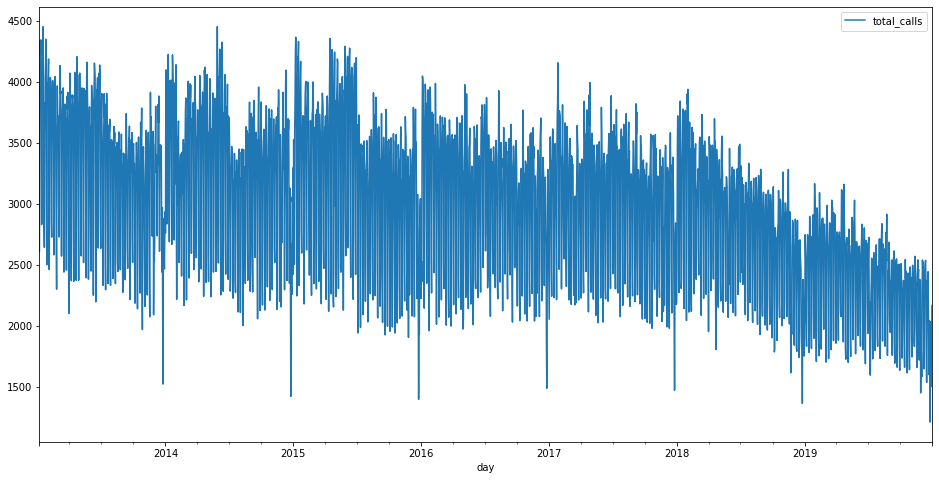

In [268]:
fig, ax = plt.subplots(figsize=(16, 8))
callData.plot(ax=ax)
plt.show()

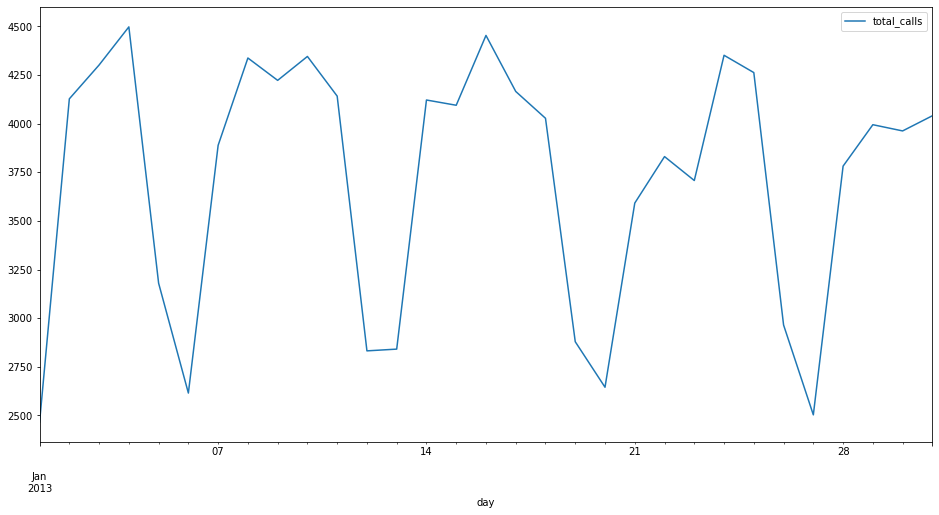

In [143]:
# I'm guessing we will see seasonal trends within each week.
calls2013_01 = callData[callData.index.isin(pd.date_range(start='20130101', end='20130131'))]
fig, ax = plt.subplots(figsize=(16, 8))
calls2013_01.plot(ax=ax)
plt.show()

There are three parts to time series data:
- Seasonality
- Trends
- Residuals

The calls are trending downward from year to year. We can eyeball that. 

I'm also seeing seasonality from year-to-year and week-to-week. Because we are only predicting the next six months (the last two quarters of 2019), I'm more concerned with the week-to-week seasonality. Ideally, we would be bringing in a multiple seasonality model.

We next need to establish stationarity in our time series data. Currently, we don't have stationarity. We will prove that in the next step.

To establish stationarity:
1. The trend must be stationary (at zero).
2. Variance must be constant.
3. How a value relates to its neighbors must stay the same (autocorrelation).

#### STATIONARITY OF ENTIRE DATAFRAME

In [427]:
#Let's test for non-stationarity.
from statsmodels.tsa.stattools import adfuller
results = adfuller(callData['total_calls'])
print(results)

(-1.5858645291308202, 0.49069024013111523, 27, 2523, {'1%': -3.432944516713937, '5%': -2.8626862482960957, '10%': -2.567380191580307}, 34698.50252655188)


From a look at our Dicky-Fuller test, the p-value (0.491) of this dataframe is not low enough to warrant a stationary dataset. Our first value (-1.58) is not enough in the negative to signal stationarity. It'll need to be at least at -2.86 to signal a 0.05 p-value.

We'll be doing this again, so let's create a function for testing stationarity.

In [428]:
def test_stationarity(data):
    p_val=adfuller(data)[1]
    if p_val >= 0.05:
        print("Time series data is not stationary. Adfuller test pvalue={}".format(p_val))
    else:
        print("Time series data is stationary. Adfuller test pvalue={}".format(p_val)) 
test_stationarity(callData)

Time series data is not stationary. Adfuller test pvalue=0.49069024013111523


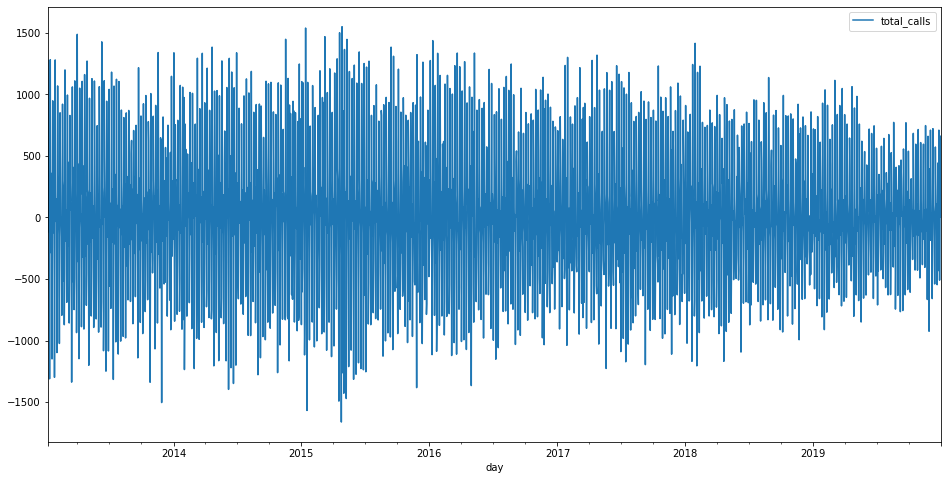

In [429]:
# Let's use the simplest way to find stationarity by taking the difference.
fig, ax = plt.subplots(figsize=(16, 8))
callDifference = callData.diff().dropna()
callDifference.plot(ax=ax)
plt.show()

In [432]:
# That made the trend stationary! Let's confirm.
test_stationarity(callDifference)

Time series data is stationary. Adfuller test pvalue=5.267388582822276e-28


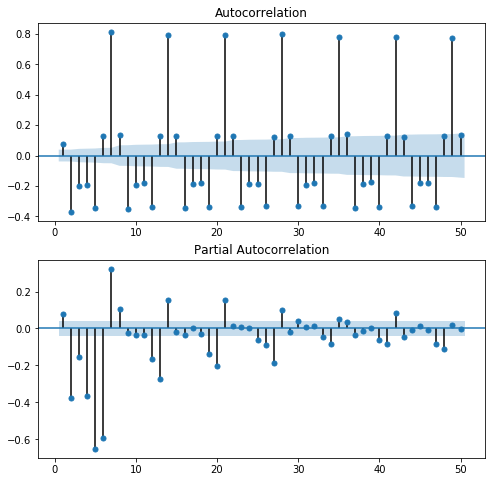

In [433]:
# Superb! We know that one degree of difference is enough to achieve stationarity.
# Let's plot the ACF and PACF to find what are p and q now need to be for our ARIMA model.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
plot_acf(callDifference, lags=50, zero=False, ax=ax1)
plot_pacf(callDifference, lags=50, zero=False, ax=ax2)
plt.show()

Nope. That didn't help. We have some strong seasonality in our data that is confirmed by our ACF. Our seasonality is weekly, which would make sense.

We could take the seasonality difference of callDifference, but I don't want to do that because our data is already stationary.

Let's go back to the drawing board and take the seasonality difference from the original dataframe. I want to zoom in on one year so that we can see the seasonal trends. Let's take a look at 2015.

#### A 2015 TEST CASE

In this section, let's zero in on 2015 so we can take a good look at the trends and seasonality. Let's look at the plot, some seasonal decomposition results and a plot of the data after we take the seasonal difference.

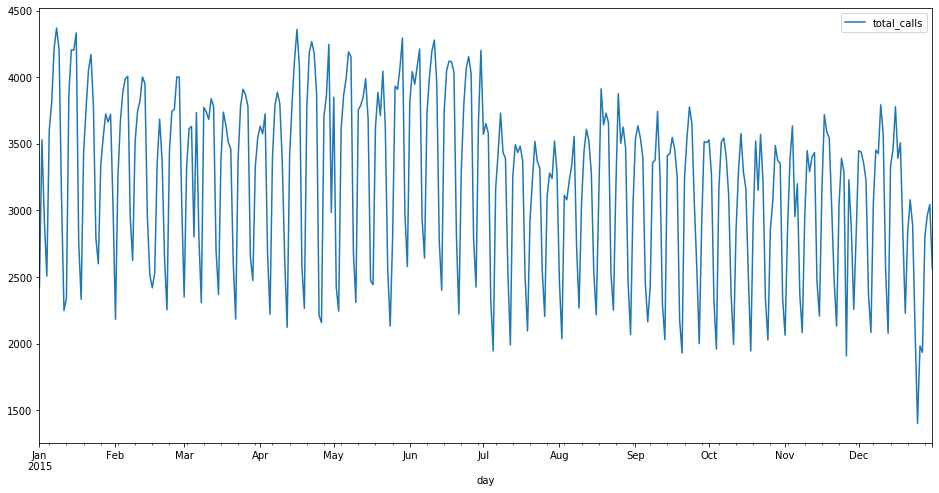

In [439]:
fig, ax = plt.subplots(figsize=(16, 8))
calls2015.plot(ax=ax)
plt.show()

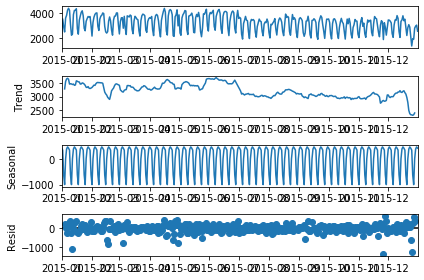

In [437]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_results = seasonal_decompose(calls2015, period=7)
decompose_results.plot()
plt.show()

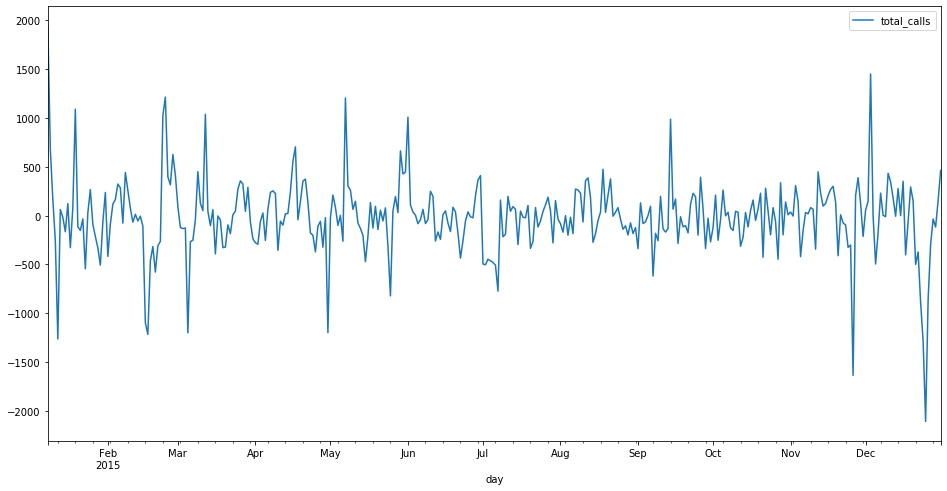

In [447]:
fig, ax = plt.subplots(figsize=(16, 8))
seasonalFirst2015 = calls2015.diff(7).dropna()
seasonalFirst2015.plot(ax=ax)
plt.show()

In [448]:
test_stationarity(seasonalFirst2015)

Time series data is stationary. Adfuller test pvalue=4.566987967703831e-07


We know that our stationarity can be reached with one degree of difference.

Let's look at a seasonal ARIMA model of: SARIMAX(df, order=(p,d,q), seasonal_order=(P,D,Q,S)

We know that d=1 gets us to stationarity, but we need to address seasonality. If we bring d back to 0 and make D=1, we achieve stationarity, as well. *Our best model will be where d=0 and D=1.* Let's look at the ACF and PACF.


#### ACF & PACF WITH ALL DATA

Now that we have solidified our seasonal data (every seven days), let's look at the ACF and PACF of our entire dataframe.

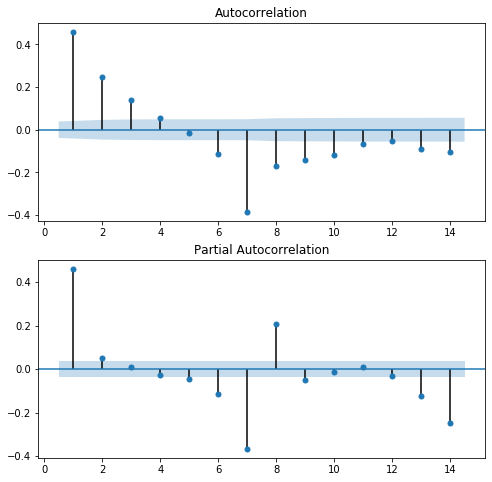

In [455]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
plot_acf(seasonalFirst, lags=14, zero=False, ax=ax1)
plot_pacf(seasonalFirst, lags=14, zero=False, ax=ax2)
plt.show()

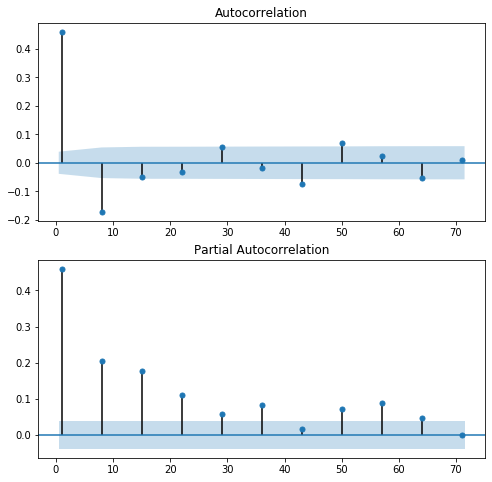

In [452]:
# Interesting. This is promising. Let's look at the ACF and PACF of our seasonal data.
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
plot_acf(seasonalFirst, lags=[1,8,15,22,29,36,43,50,57,64,71], zero=False, ax=ax1)
plot_pacf(seasonalFirst, lags=[1,8,15,22,29,36,43,50,57,64,71], zero=False, ax=ax2)
plt.show()

YES!!

The general data looks like an AR(2) model, and the seasonal looks like an MA(2) model. That would mean our numbers would look like this:

order = (2,0,0)
seasonal_order = (0,1,2)

Let's look at an auto-generated ARMA model and see what we come up with.

##### MODELING

We have already created our training data. Let's plug this into our auto-ARIMA function and see what they come up with. I'll also create a model for the results I found above to compare the two models in preparation for final modeling.

In [456]:
results = pm.auto_arima(trainingData, seasonal=True, m=7, d=0, D=1, information_criterion='aic', error_action='ignore')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

In [463]:
print(results.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                 2367
Model:             SARIMAX(4, 0, 1)x(2, 1, [1, 2], 7)   Log Likelihood              -16120.921
Date:                                Tue, 29 Sep 2020   AIC                          32263.843
Time:                                        10:19:27   BIC                          32327.273
Sample:                                             0   HQIC                         32286.939
                                               - 2367                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0284      0.022     -1.266      0.206      -0.072       0.016
ar.

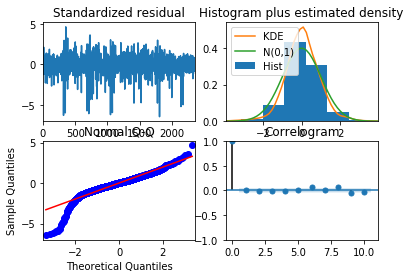

In [464]:
results.plot_diagnostics()
plt.show()

In [459]:
my_model = SARIMAX(
    trainingData,
    order=(2, 0, 0),
    seasonal_order=(0, 1, 2, 7))
my_results = my_model.fit()
my_results.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                            total_calls   No. Observations:                 2367
Model:             SARIMAX(2, 0, 0)x(0, 1, [1, 2], 7)   Log Likelihood              -16151.826
Date:                                Tue, 29 Sep 2020   AIC                          32313.652
Time:                                        10:16:38   BIC                          32342.484
Sample:                                    01-06-2013   HQIC                         32324.150
                                         - 06-30-2019                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5212      0.013     38.838      0.000       0.495       0.547
ar.L2          0.0556      0.018      3.116      0.002       0.021       0.091
ma.S.L7       -0.7893      0.018    -43.601      0.000      -0.825      -0.754
ma.S.L14      -0.1253      0.018     -6.954      0.000      -0.161      -0.090
sigma2      5.121e+04    772.814     66.271      0.000    4.97e+04    5.27e+04
===================================================================================
Ljung-Box (Q):                      104.11   Jarque-Bera (JB):              4536.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                            -1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

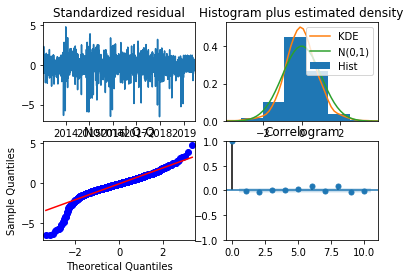

In [465]:
my_results.plot_diagnostics()
plt.show()

Comparing AICs between the auto-generated and my own generated ARMA models, my model wins out by just a bit. I'll use this for our final model moving forward.

#### FORECASTING & PREDICTING

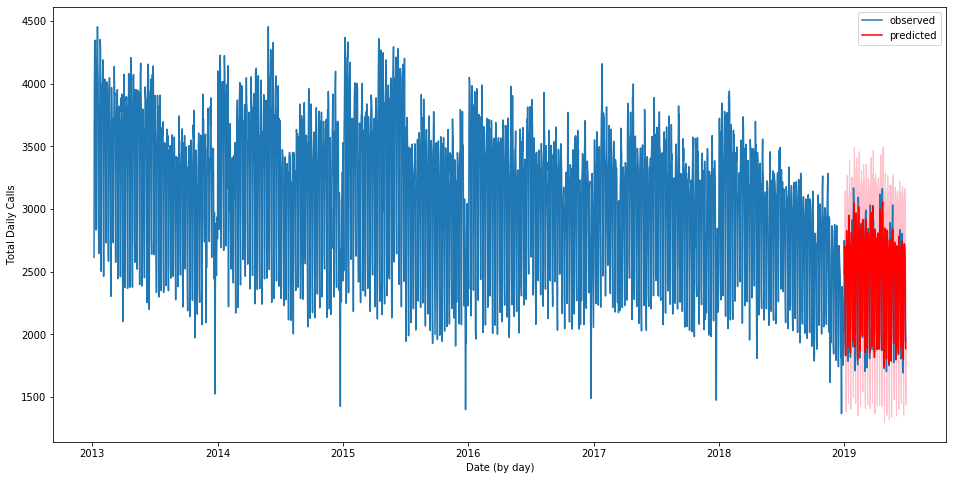

In [466]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(trainingData.index, trainingData, label='observed')

one_step_forecast = my_results.get_prediction(start=-180)
mean_forecast = one_step_forecast.predicted_mean
confidence_intervals = one_step_forecast.conf_int()

lower_limits = confidence_intervals.loc[:, 'lower total_calls']
upper_limits = confidence_intervals.loc[:, 'upper total_calls']

plt.plot(mean_forecast.index, mean_forecast, color='r', label='predicted')
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

plt.xlabel('Date (by day)')
plt.ylabel('Total Daily Calls')
plt.legend()
plt.show()

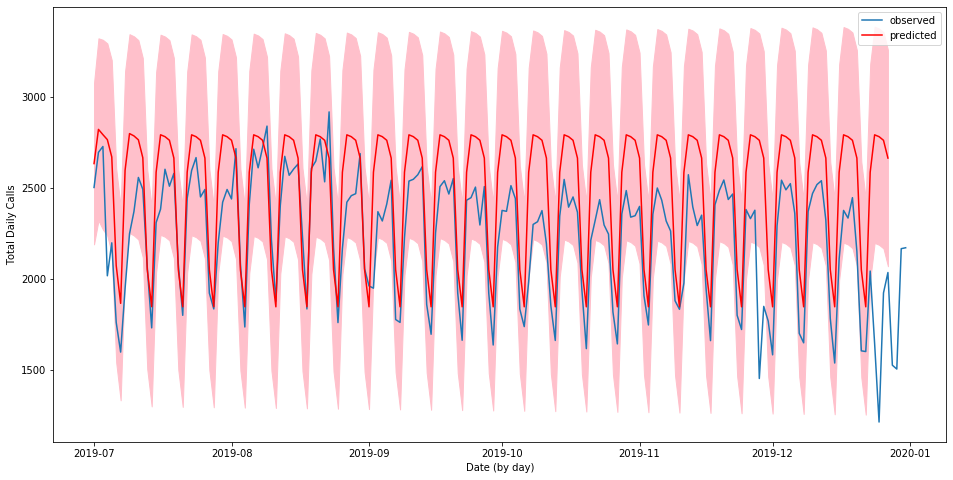

In [480]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(testData.index, testData, label='observed')

future_forecast = my_results.get_forecast(steps=180, dynamic=True)
mean_forecast = future_forecast.predicted_mean
confidence_intervals = future_forecast.conf_int()

lower_limits = confidence_intervals.loc[:, 'lower total_calls']
upper_limits = confidence_intervals.loc[:, 'upper total_calls']

plt.plot(mean_forecast.index, mean_forecast, color='r', label='predicted')
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

plt.xlabel('Date (by day)')
plt.ylabel('Total Daily Calls')
plt.legend()
plt.show()

#### CHANGE IN AVERAGE DAILY CALLS

In [469]:
calls201501.mean()

total_calls    2965.857741
dtype: float64

In [470]:
calls201901.mean()

total_calls    2463.65566
dtype: float64

In [479]:
round((1-(calls201901.mean()/calls201501.mean()))*100, 2)

total_calls    16.93
dtype: float64

#### ACTIONABLE RECOMMENDATIONS

As seen in the chart above, we were able to predict fairly accurately how many service calls are scheduled to come into the call center for the test data, which, as you may recall, is the final six months of 2019.

We aren't currently factoring in the yearly seasonal data into this model. This would help improve the model's accuracy. This is an area to enhance this model moving forward.

Practically speaking, here are my recommendations:
- We saw a drop in service calls through 2018. Looking across several years of data, I wouldn't expect that decreasing trend to continue. I would anticipate total daily calls to sit between 1,750 and 2,750 per day. 
- Continue to anticpate the weekly rhythms of call volume. I don't foresee these changing.
- Regarding staffing, our average number of services calls has dropped from 2,966 per day in the first half of 2015 to 2,464 calls in the first half of 2019. That is a 16% decrease in sales calls, and I anticipate that decreased call average to remain steady for the rest of 2019.

Finally, let's run these numberrs again in December when we begin to look at budgets for our 2020-21 fiscal year (beginning in July 1). We may be able to reassess staffing and decrease the budget by at least 10%.